In [7]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from scipy.io import loadmat
import pickle
import utils
import nest_asyncio
import arviz as az

In [48]:
# reading the RL model span
file_name = 'models/RL_W.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

# reading the observed data
session = 1
subName = 'sub-076'
direc = "sub-X47863_ses-01_task-DA_run-2_beh_20211221_11-26-32"
examples_dir = "../data/" + subName + "/ses-0" + str(session+1) + "achieva7t/" + direc + ".csv"
df = pd.read_csv(examples_dir)
dfCond = df[df.block == 'Act']
# irregular responce 
resAct = dfCond['pushed'].to_numpy().astype(int)
dfCondDrop = dfCond[resAct>=0]

#set inistial data for molde span
data = {'N':int(dfCondDrop.shape[0]),     
         'pushed':np.array(dfCondDrop.pushed).astype(int),  
         'yellowChosen':np.array(dfCondDrop.yellowChosen).astype(int), 
         'winAmtPushable':np.array(dfCondDrop.winAmtPushable).astype(int), 
         'winAmtYellow':np.array(dfCondDrop.winAmtYellow).astype(int), 
         'rewarded':np.array(dfCondDrop.correctChoice).astype(int), 
         'p_push_init':.5, 
         'p_yell_init':.5}

In [49]:
firstCond = dfCond.stimActFirst.to_numpy()[0]

resAct = dfCond['pushed'].to_numpy().astype(int)
pushed = np.where(resAct==1)[0] + 1
pulled = np.where(resAct==0)[0] + 1
noRes  = np.where(resAct < 0)[0] + 1

corrAct= dfCond['pushCorrect']
pushCorr = np.where(corrAct==1)[0] + 1
pulledCorr = np.where(corrAct==0)[0] + 1


pltData = ({'label': ['pushed', 'push correct', 'no response', 'pull correct', 'pulled'],
            'choise': [pushed, pushCorr, noRes, pulledCorr, pulled]})
dfPlot = pd.DataFrame(pltData)

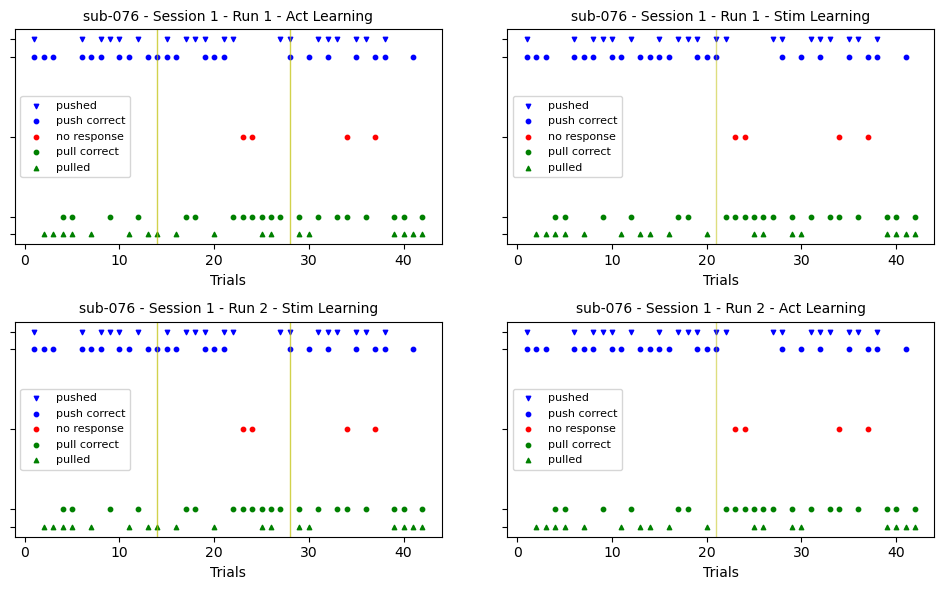

In [50]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)

columns = 2
rows = 2

y = [3.2 ,3, 2.1 , 1.2, 1] 
markers = ['v', 'o', 'o' , 'o', '^']
colors =['blue','blue', 'red', 'green', 'green']

if (firstCond == 'Act' and session == 1) or (firstCond == 'Stim' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning']
elif (firstCond == 'Stim' and session == 1) or (firstCond == 'Act' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning']


for idx in range(columns*rows):
    fig.add_subplot(rows, columns, idx + 1)
    #create a list of y coordinates for every x coordinate
    for i in range(len(dfPlot)):
        plt.scatter(dfPlot.choise[i],[y[i] for j in range(len(dfPlot.choise[i]))], 
                    s=10, c=colors[i], marker=markers[i])


    plt.yticks(y,[]) #show the empy y axis label
    plt.legend(dfPlot.label, fontsize=8)
    plt.xlabel('Trials', fontsize=10)
    plt.title(titles[idx], fontsize=10)
    
    if idx%2==1:
        plt.axvline(x = 21, color='y', linewidth=1, alpha=.5)
    else:
        plt.axvline(x = 14, color='y', linewidth=1, alpha=.7)
        plt.axvline(x = 28, color='y', linewidth=1, alpha=.7)

plt.subplots_adjust(wspace=10.)
plt.show()

# fig.savefig('out.png', dpi=300)

In [51]:
#import nest_asyncio
#nest_asyncio.apply()

In [52]:
posterior = stan.build(stan_model, data = data)

Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 

In file included from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/functor.hpp:15,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include

Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s


/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp: In constructor 'model_xigwixxh_namespace::model_xigwixxh::model_xigwixxh(stan::io::var_context&, unsigned int, std::ostream*)':
/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp:119:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
  119 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
In file included from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
/home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan

Building: 12.0s
Building: 12.1s
Building: 12.2s


/home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of 'TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]':
/home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:57:   required from 'auto stan::math::grad_2F1(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool ReturnSameT = true; T1 = var_value<double>; T2 = var_value<double>; T3 = var_value<double>; T_z = var_value<

Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s


/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp: In instantiation of 'void model_xigwixxh_namespace::model_xigwixxh::transform_inits_impl(const stan::io::var_context&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; stan::require_vector_t<T_y>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]':
/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp:985:25:   required from here
/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp:786:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
  786 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/mrhome/amingk/.cache/httpstan/4.10.0/models/xigwixxh/model_xigwixxh.cpp: In instantiation of 'void model_xigwixxh_namespace::model_xigwixxh::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI =

Building: 12.8s
Building: 12.9s
Building: 13.0s


/home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of 'TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]':
/home/amingk/anaconda3/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from 'TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<doub

Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.3s
Building

Building: 23.7s, done.
Messages from stanc:
Warning in '/tmp/httpstan_udh78yoh/model_xigwixxh.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_udh78yoh/model_xigwixxh.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_udh78yoh/model_xigwixxh.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to


### At Random

In [26]:
# reading the RL model span
file_name = 'models/RL_W.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

# reading the observed data
session = 1
subName = 'sub-076'
direc = "sub-X47863_ses-01_task-DA_run-1_beh_20211221_10-31-13"
examples_dir = "../data/" + subName + "/ses-0" + str(session+1) + "achieva7t/" + direc + ".csv"
df = pd.read_csv(examples_dir)
dfCond = df[df.block == 'Act']
# irregular responce 
resAct = dfCond['pushed'].to_numpy().astype(int)
dfCondDrop = dfCond[resAct>=0]

#set inistial data for molde span
data = {'N':int(dfCondDrop.shape[0]),     
         'pushed':np.array(dfCondDrop.pushCorrect).astype(int),  
         'yellowChosen':1-dfCondDrop.pushCorrect.to_numpy().astype(int), 
         'winAmtPushable':np.array(dfCondDrop.winAmtPushable).astype(int), 
         'winAmtYellow':np.array(dfCondDrop.winAmtYellow).astype(int), 
         'rewarded':np.array(np.ones(40)).astype(int), 
         'p_push_init':.5, 
         'p_yell_init':.5}

Text(0.5, 1.0, 'Weightening')

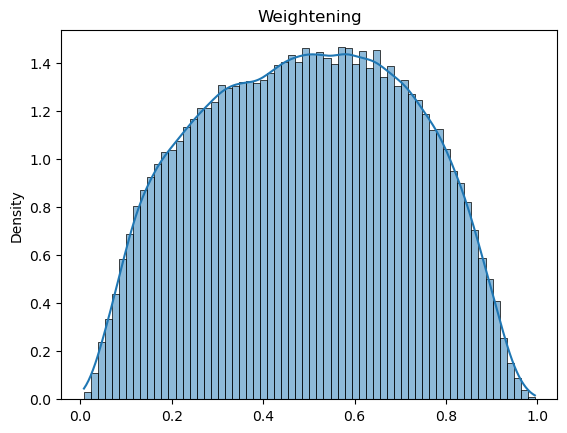

In [30]:
sns.histplot(weightAct_[0], kde=True, stat='density')
plt.title('Weightening')

Text(0.5, 1.0, 'Sensitivity')

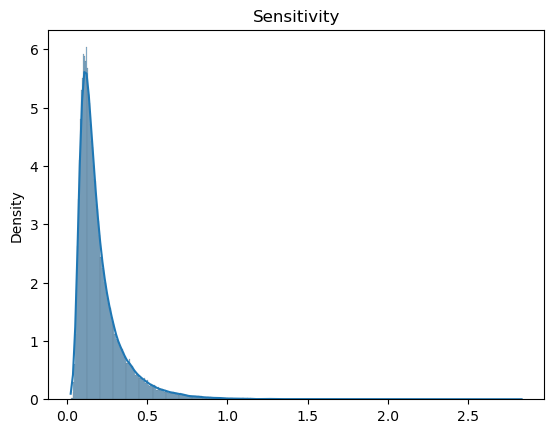

In [31]:
sns.histplot(beta_[0], kde=True, stat='density')
plt.title('Sensitivity')

In [1]:
"""Model fit for competing Action Value Learning and Stimulus Value Learning in the cotext of Reinforcement Learning at the individual level"""ndividual RL

In [22]:
# If you want to model fit or just recall ex model fit
modelFit = False
# Number of chains in MCMC procedure
n_chains = 10
# The number of iteration or samples for each chain in MCM procedure
n_samples=5000
# Name of subject
subName = 'sub-030'
# Main directory of the subject
subMainDirec = 'data/originalfMRIbehFiles/'

In [23]:
# The adrees name of pickle file
pickelDir = subMainDirec + subName + '/' + subName +'_inv_RLActClr.pkl'
if modelFit == True: 
    """Fitting data to model and then save as pickle file in the subject directory if modelFit = True"""
    # List of existing .csv files for each session and run realted to the subject
    files = ['/ses-02achieva7t/' + subName + '_ses-02achieva7t_task-DA_run-1_beh.csv',
             '/ses-02achieva7t/' + subName + '_ses-02achieva7t_task-DA_run-2_beh.csv',
             '/ses-03achieva7t/' + subName + '_ses-03achieva7t_task-DA_run-1_beh.csv',
             '/ses-03achieva7t/' + subName + '_ses-03achieva7t_task-DA_run-2_beh.csv']
    # Making empty Dataframe to be appended for all four .csv file of the subject
    data = pd.DataFrame([])
    for i in range(len(files)):
        direc = subMainDirec + subName + files[i]
        df = pd.read_csv(direc)
        data = pd.concat([data, df])
    # Detection of irregular responces (no-responses or error responces)
    temp = data['pushed'].to_numpy().astype(int)
    dataClear = data[temp>=0]
    # Put required data for stan model
    dataStan = {'N':int(dataClear.shape[0]),  
                'nCond':2, 
                'nSes':2, 
                'pushed':np.array(dataClear.pushed).astype(int),  
                'yellowChosen':np.array(dataClear.yellowChosen).astype(int), 
                'winAmtPushable':np.array(dataClear.winAmtPushable).astype(int), 
                'winAmtYellow':np.array(dataClear.winAmtYellow).astype(int), 
                'rewarded':np.array(dataClear.correctChoice).astype(int),       
                'session':np.array(dataClear.session).astype(int), 
                'cond':np.array(dataClear.block.replace('Act',1).replace('Stim',2)).astype(int),  
                'p_push_init':.5, 
                'p_yell_init':.5}

    # Loading the RL Stan Model
    file_name = 'stan_models/inv_RLActClr.stan' 
    file_read = open(file_name, 'r')
    stan_model = file_read.read()
    # Use nest-asyncio.This package is needed because Jupter Notebook blocks the use of certain asyncio functions
    nest_asyncio.apply()
    # Building Stan Model realted to our proposed model
    posterior = stan.build(stan_model, data = dataStan)
    # Start for taking samples from parameters in the Stan Model
    fit = posterior.sample(num_chains=n_chains, num_samples=n_samples)
  
    # Save Model Fit
    utils.to_pickle(stan_fit=fit, save_path = pickelDir)
else:
    """Loading the pickle file of model fit from the subject directory if modelFit = False"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit']

In [ ]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_ = fit["alphaAct_"] 
alphaClr_ = fit["alphaClr_"] 
weightAct_ = fit["weightAct_"] 
beta_ = fit["beta_"] 

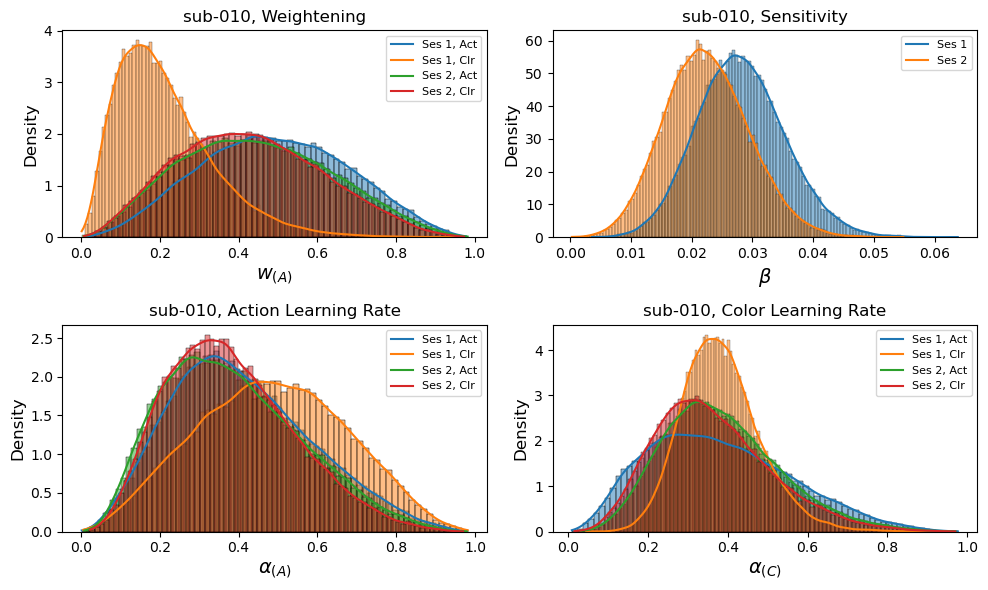

In [25]:
# Figure of mofel fit results
fig = plt.figure(figsize=(10, 6), tight_layout=True)

columns = 2
rows = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weightAct_[0, 0], kde=True, stat='density')
sns.histplot(weightAct_[0, 1], kde=True, stat='density')
sns.histplot(weightAct_[1, 0], kde=True, stat='density')
sns.histplot(weightAct_[1, 1], kde=True, stat='density')
plt.title(subName + ', Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)


# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(beta_[0], kde=True, stat='density')
sns.histplot(beta_[1], kde=True, stat='density')
plt.title(subName + ', Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)
plt.legend(['Ses 1', 'Ses 2'], fontsize=8)


# Action Learning Rate
fig.add_subplot(rows, columns, 3)
sns.histplot(alphaAct_[0, 0], kde=True, stat='density')
sns.histplot(alphaAct_[0, 1], kde=True, stat='density')
sns.histplot(alphaAct_[1, 0], kde=True, stat='density')
sns.histplot(alphaAct_[1, 1], kde=True, stat='density')
plt.title(subName + ', Action Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(A)} $', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
sns.histplot(alphaClr_[0, 0], kde=True, stat='density')
sns.histplot(alphaClr_[0, 1], kde=True, stat='density')
sns.histplot(alphaClr_[1, 0], kde=True, stat='density')
sns.histplot(alphaClr_[1, 1], kde=True, stat='density')
plt.title(subName + ', Color Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(C)} $', fontsize=14)
plt.legend(['Ses 1, Act', 'Ses 1, Clr', 'Ses 2, Act', 'Ses 2, Clr'], fontsize=8)


plt.subplots_adjust(wspace=10.)
plt.show()

fig.savefig(subMainDirec + subName + '/' + subName +'_inv_rlActClr.png', dpi=300)

In [31]:
weightAct_[0,0].mean(), weightAct_[0,1].mean(), weightAct_[1,0].mean(), weightAct_[1,1].mean()

((50000,), 0.2145521526747519, 0.446582494286949, 0.4294035911194741)